In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Load the dataset
data = pd.read_csv('/kaggle/input/us-accidents/US_Accidents_March23.csv')


In [4]:

# Display the first few rows of the dataset to understand its structure
print(data.head())


    ID   Source  Severity           Start_Time             End_Time  \
0  A-1  Source2         3  2016-02-08 05:46:00  2016-02-08 11:00:00   
1  A-2  Source2         2  2016-02-08 06:07:59  2016-02-08 06:37:59   
2  A-3  Source2         2  2016-02-08 06:49:27  2016-02-08 07:19:27   
3  A-4  Source2         3  2016-02-08 07:23:34  2016-02-08 07:53:34   
4  A-5  Source2         2  2016-02-08 07:39:07  2016-02-08 08:09:07   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.865147 -84.058723      NaN      NaN          0.01  ...      False   
1  39.928059 -82.831184      NaN      NaN          0.01  ...      False   
2  39.063148 -84.032608      NaN      NaN          0.01  ...      False   
3  39.747753 -84.205582      NaN      NaN          0.01  ...      False   
4  39.627781 -84.188354      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False          F

In [5]:

# Check for missing values
print(data.isnull().sum())


ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

In [6]:
# Drop rows with missing values or handle missing values based on your requirement
data = data.dropna()

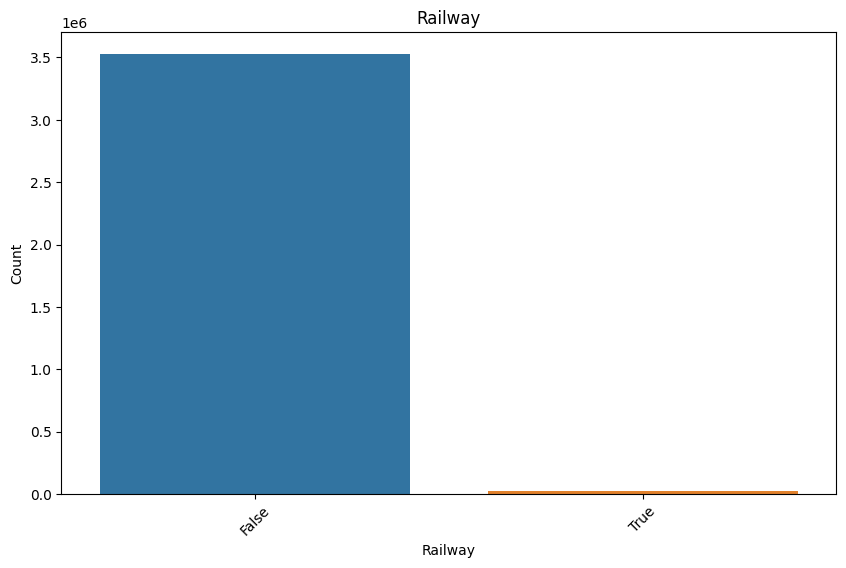

In [7]:
# Analyze road conditions
road_condition_counts = data['Railway'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=road_condition_counts.index, y=road_condition_counts.values)
plt.title('Railway')
plt.xlabel('Railway')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

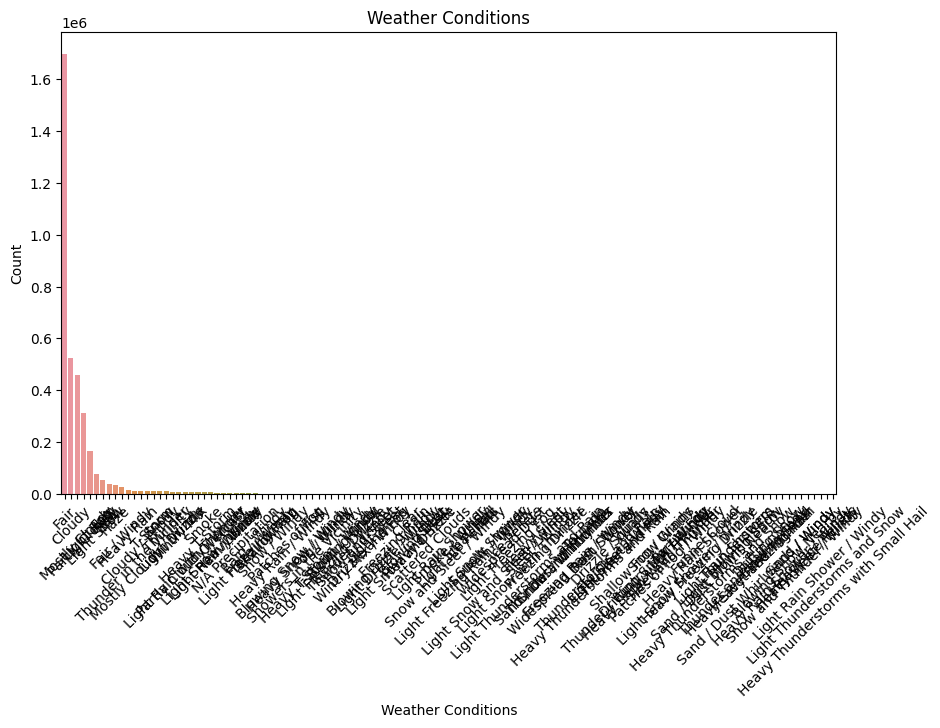

In [8]:
# Analyze weather conditions
weather_counts = data['Weather_Condition'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=weather_counts.index, y=weather_counts.values)
plt.title('Weather Conditions')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


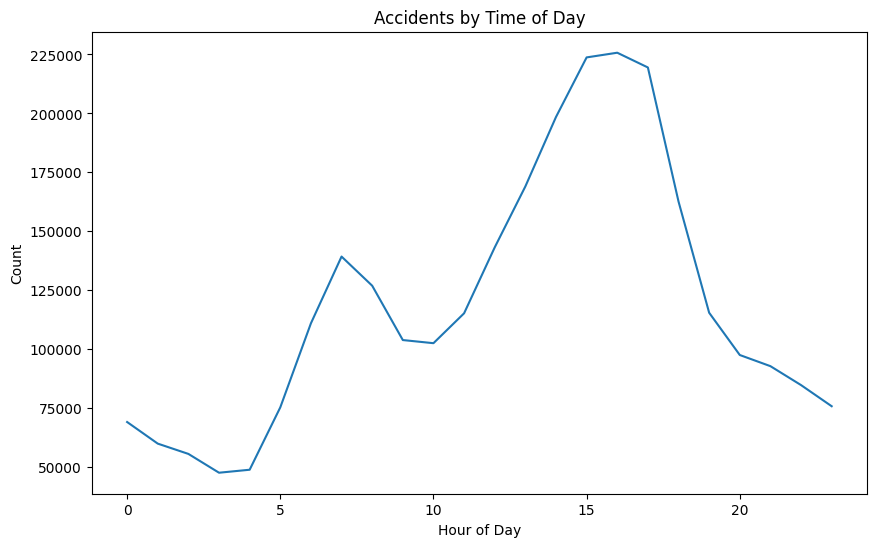

In [9]:

# Convert Start_Time to datetime
data['Start_Time'] = pd.to_datetime(data['Start_Time'], format='%Y-%m-%d %H:%M:%S', errors='coerce')

# Drop rows with invalid datetime values
data = data.dropna(subset=['Start_Time'])

# Extract hour from Start_Time
data['Hour'] = data['Start_Time'].dt.hour

# Analyze time of day
time_counts = data['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x=time_counts.index, y=time_counts.values)
plt.title('Accidents by Time of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Count')
plt.show()

Start_Lat    0
Start_Lng    0
dtype: int64


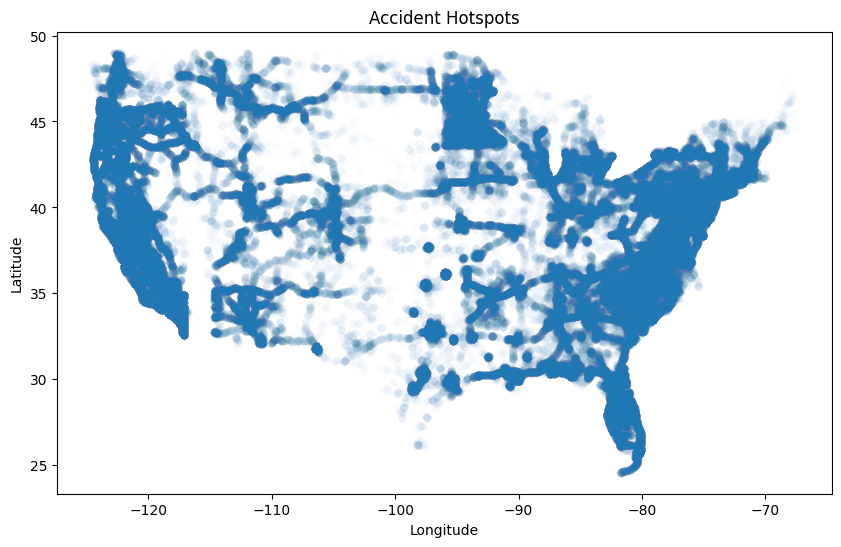

In [10]:
# Check for missing values in Longitude and Latitude
print(data[['Start_Lat', 'Start_Lng']].isnull().sum())

# Drop rows with missing values in Longitude and Latitude
data = data.dropna(subset=['Start_Lat', 'Start_Lng'])

# Visualize accident hotspots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Start_Lng', y='Start_Lat', data=data, alpha=0.01)
plt.title('Accident Hotspots')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [12]:
# Check for columns that might be related to contributing factors
contributing_factor_columns = [col for col in data.columns if 'factor' in col.lower()]

print("Contributing factor columns found:", contributing_factor_columns)

# Analyze contributing factors if the columns exist
if contributing_factor_columns:
    contributing_factors = data[contributing_factor_columns]
    contributing_factors_counts = contributing_factors.stack().value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=contributing_factors_counts.index, y=contributing_factors_counts.values)
    plt.title('Contributing Factors')
    plt.xlabel('Contributing Factors')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()
else:
    print("No contributing factor columns found in the dataset.")

Contributing factor columns found: []
No contributing factor columns found in the dataset.
